Importing all Libraries

In [38]:
import pandas as pd   #import pandas
import seaborn as sns
import csv
import numpy as np    #import numpy
import matplotlib.pyplot as plt
import warnings                    #import waarnigs to ingonre any kind of warning while runing code
warnings.filterwarnings("ignore")

In [39]:
df=pd.read_csv("customer_churn_large_dataset.csv")

In [40]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [41]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [42]:
df.shape

(100000, 9)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [44]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Checking Missing Values

In [45]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Feature Engineering

In [46]:
df['Age']
agebins=[17,30,40,50,60,71]
agelabels=['17-30', '31-40', '41-50', '51-60', '61-71']
df['Age_Group'] = pd.cut(df['Age'], bins=agebins, labels=agelabels)
df


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,61-71
1,2,Customer_2,62,Female,New York,1,48.76,172,0,61-71
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,17-30
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,31-40
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,41-50
...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,31-40
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,61-71
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,61-71
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,51-60


In [47]:
#df['Subscript_Length_Months']=df['Subscription_Length_Months'].map({'1-5':1,'6-10':2,'11-15':3,'16-20':4,'21-25':4})
df['Subscription_Length_Months']
subsbins=[0,5,10,15,20,25]
sublables=['0-5','6-10','11-15','16-20','21-25']
df['Subscription_Length_Month']=pd.cut(df['Subscription_Length_Months'], bins=subsbins, labels=sublables)
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_Length_Month
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,61-71,16-20
1,2,Customer_2,62,Female,New York,1,48.76,172,0,61-71,0-5
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,17-30,0-5
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,31-40,0-5
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,41-50,16-20
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,31-40,21-25
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,61-71,16-20
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,61-71,16-20
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,51-60,16-20


In [48]:

df['Monthly_Bill']
billsbins=[29,40,50,60,70,80,90,101]
billslables=['29-40','41-50','51-60','61-70','71-80','81-90','91-101']
df['Monthly_Bills']=pd.cut(df['Monthly_Bill'],bins=billsbins,labels=billslables)
df


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_Length_Month,Monthly_Bills
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,61-71,16-20,71-80
1,2,Customer_2,62,Female,New York,1,48.76,172,0,61-71,0-5,41-50
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,17-30,0-5,81-90
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,31-40,0-5,91-101
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,41-50,16-20,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,31-40,21-25,51-60
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,61-71,16-20,61-70
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,61-71,16-20,91-101
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,51-60,16-20,41-50


In [49]:
#df['TotalUsage_GB']=df['Total_Usage_GB'].map({'50-100':1,'101-200':2,'201-300':3,'301-400':4,'401-500':5})
df['Total_Usage_GB']
usagebins=[49,100,200,300,400,501]
usagelables=['49-100','101-200','201-300','301-400','401-501']
df['TotalUsage_GB']=pd.cut(df['Total_Usage_GB'],bins=usagebins,labels=usagelables)
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_Length_Month,Monthly_Bills,TotalUsage_GB
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,61-71,16-20,71-80,201-300
1,2,Customer_2,62,Female,New York,1,48.76,172,0,61-71,0-5,41-50,101-200
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,17-30,0-5,81-90,401-501
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,31-40,0-5,91-101,201-300
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,41-50,16-20,51-60,201-300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,31-40,21-25,51-60,201-300
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,61-71,16-20,61-70,301-400
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,61-71,16-20,91-101,201-300
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,51-60,16-20,41-50,401-501


Converting Catcol columns in numerical

In [50]:
numcol=df.select_dtypes(["int64","float64"]).columns
catcol=df.select_dtypes(["object","category"]).columns

In [51]:
numcol

Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')

In [52]:
catcol

Index(['Name', 'Gender', 'Location', 'Age_Group', 'Subscription_Length_Month',
       'Monthly_Bills', 'TotalUsage_GB'],
      dtype='object')

In [53]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])

In [54]:
x=df.drop(['CustomerID','Age','Name','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn'],axis=1)

In [55]:
x.columns

Index(['Gender', 'Location', 'Age_Group', 'Subscription_Length_Month',
       'Monthly_Bills', 'TotalUsage_GB'],
      dtype='object')

In [56]:
y=df['Churn']

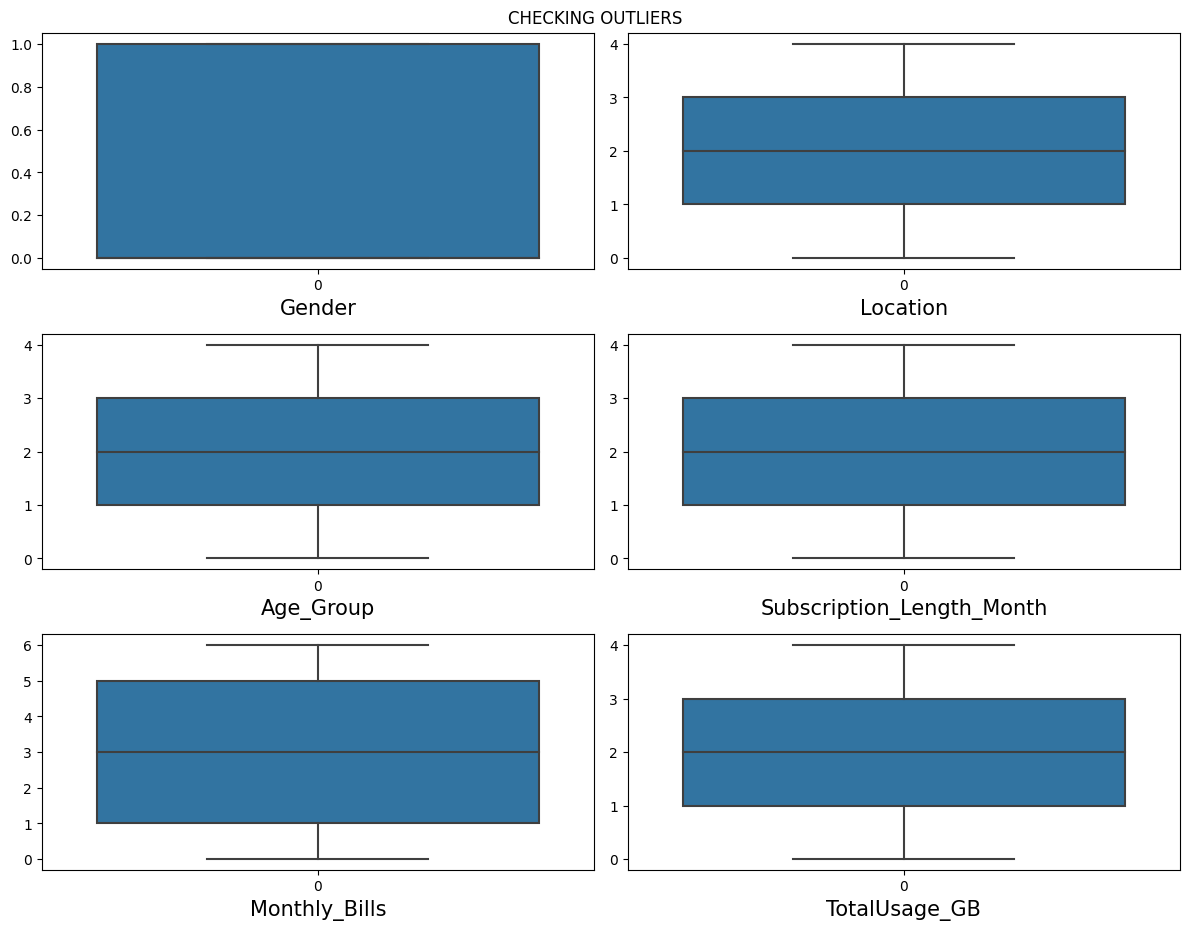

In [57]:
plt.figure(figsize=(12,12))
plt.suptitle("CHECKING OUTLIERS")
pltn=1
for i in x:
 if pltn<=8:
  ax=plt.subplot(4,2,pltn)
  sns.boxplot(df[i])
  plt.xlabel(i,fontsize=15)
 pltn=pltn+1
plt.tight_layout()

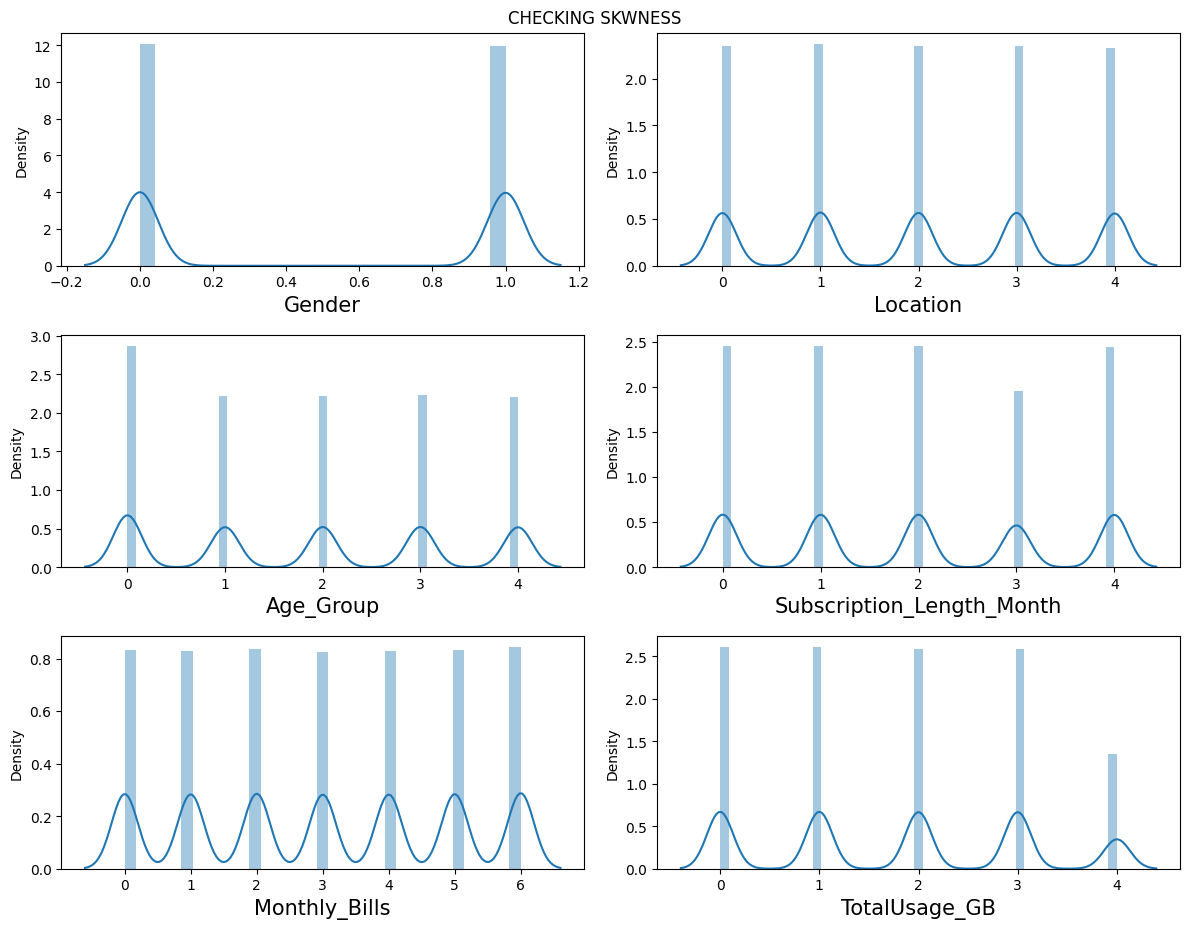

In [58]:
plt.figure(figsize=(12,12))
plt.suptitle("CHECKING SKWNESS")
pltn=1
for i in x:
 if pltn<=8:
  ax=plt.subplot(4,2,pltn)
  sns.distplot(df[i])
  plt.xlabel(i,fontsize=15)
 pltn=pltn+1
plt.tight_layout()

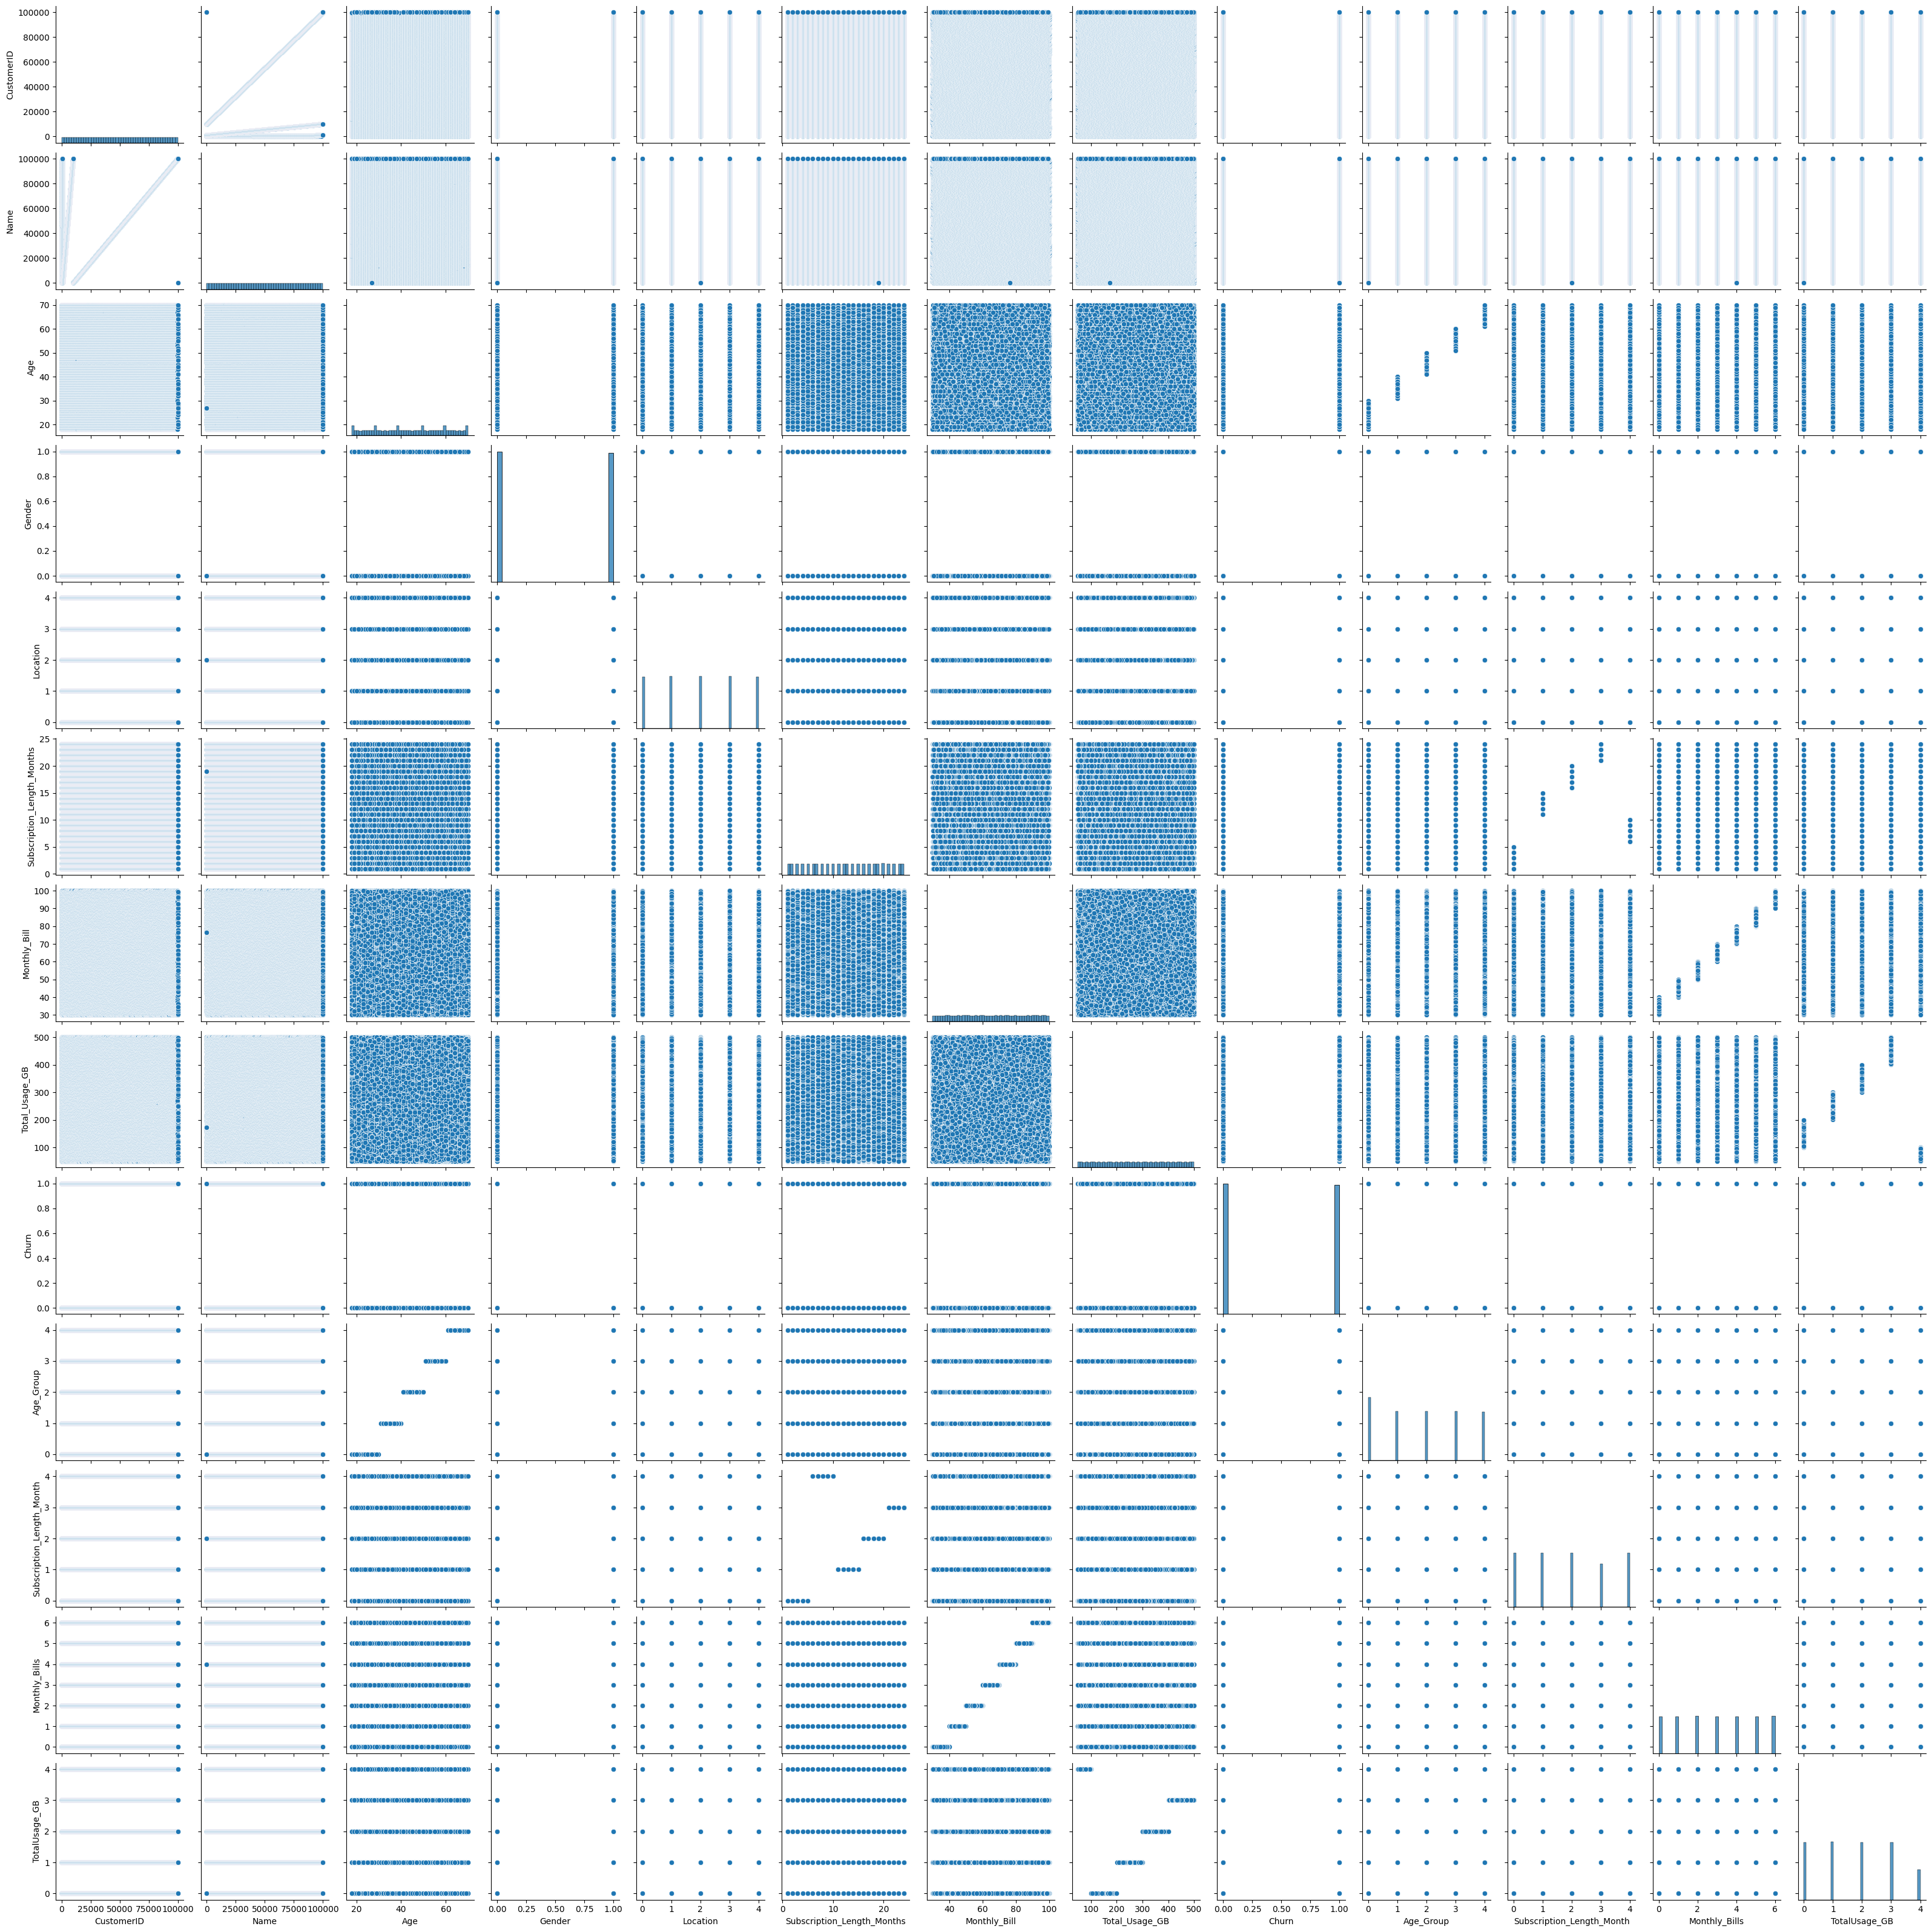

In [59]:
sns.pairplot(df)

<AxesSubplot: >

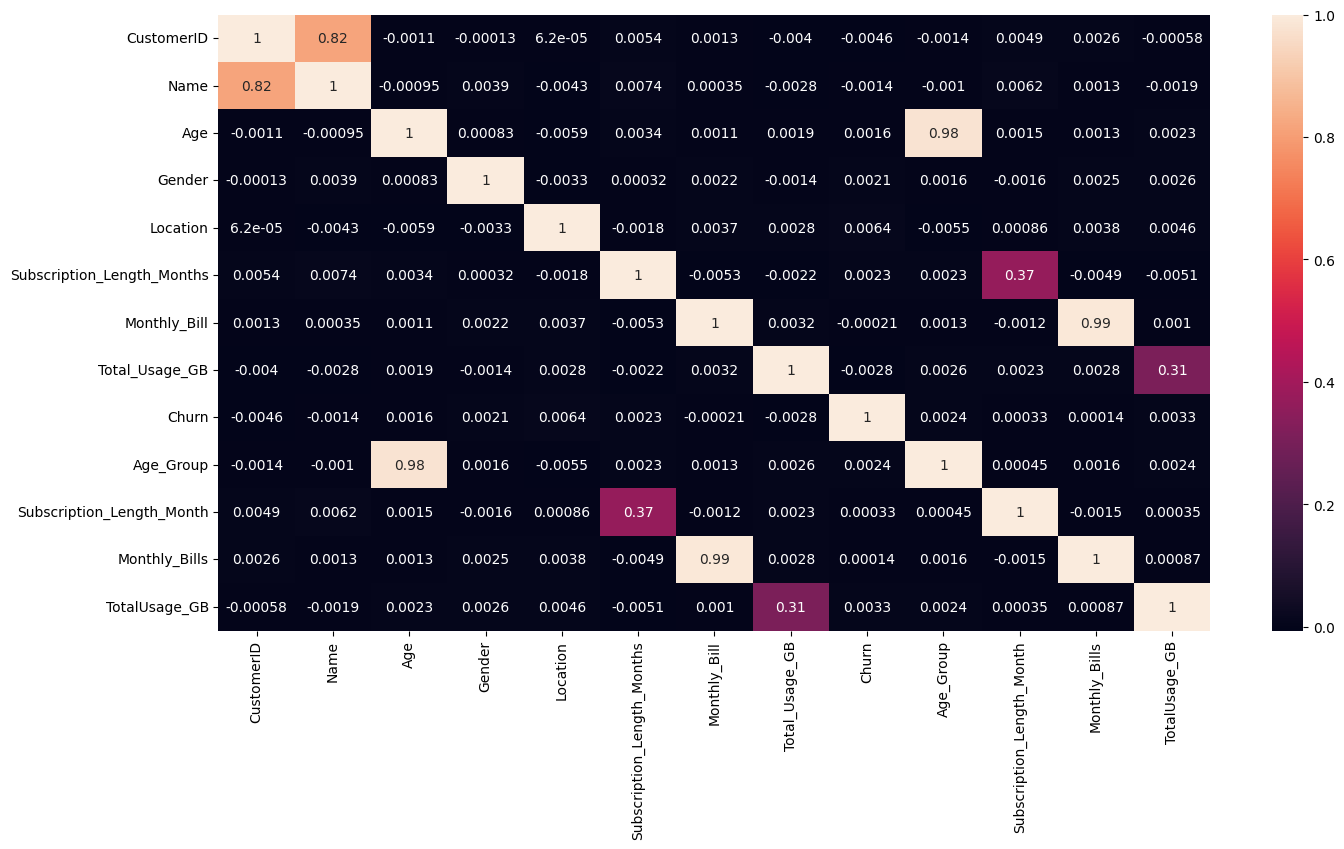

In [60]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_=scaler.fit_transform(x)

Spliting data into Train and Test

In [62]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_,y,test_size=0.3,random_state=16)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [64]:
def mymodel(model):
    
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)

    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)

    print(f"Training score:{train}\nTesting score:{test}")
    print(classification_report(ytest,ypred))

    return model

In [65]:
#KNeighborsClassifier
knn=mymodel(KNeighborsClassifier())

Training score:0.6104142857142857
Testing score:0.4974
              precision    recall  f1-score   support

           0       0.50      0.49      0.50     15088
           1       0.49      0.50      0.50     14912

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [66]:
#LogisticRegression
lr=mymodel(LogisticRegression())

Training score:0.5045857142857143
Testing score:0.5000666666666667
              precision    recall  f1-score   support

           0       0.50      0.64      0.56     15088
           1       0.50      0.36      0.42     14912

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



In [67]:
rn=mymodel(RandomForestClassifier(n_estimators=100))

Training score:0.6378714285714285
Testing score:0.49623333333333336
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15088
           1       0.49      0.49      0.49     14912

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



Importing pickle

In [68]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))